In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Objective:**

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

**About organization:** 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**Problem Statement:**       
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Understanding the dataset

In [42]:
data_dictionary=pd.read_csv('data-dictionary.csv')
for i in range(len(data_dictionary['Column Name'])):
    print(data_dictionary['Column Name'][i],'\n\t',data_dictionary['Description'][i])

country 
	 Name of the country
child_mort 
	 Death of children under 5 years of age per 1000 live births
exports 
	 Exports of goods and services per capita. Given as %age of the GDP per capita
health 
	 Total health spending per capita. Given as %age of GDP per capita
imports 
	 Imports of goods and services per capita. Given as %age of the GDP per capita
Income 
	 Net income per person
Inflation 
	 The measurement of the annual growth rate of the Total GDP
life_expec 
	 The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer 
	 The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp 
	 The GDP per capita. Calculated as the Total GDP divided by the total population.


In [43]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [46]:
data.shape

(167, 10)

In [47]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [48]:
x=data.drop(['country'],axis=1).values

# Choosing the number of clusters
WCSS -> Within Clusters Sum of Squares


*   The higher the value of WCSS is, the clustering will be less accurate.
*   The lesser the value of WCSSS, the clustering will be more accurate.
*   kmeans.intertia_ has the WCSS value for the current number of clusters.
*   init = 'K-means++' is the centroid initialization for each cluster. (Choosing the right random data point in each cluster.)








In [49]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[117459687469.07816, 36528387934.322105, 21710210039.754135, 14610713446.53513, 10665874358.647747, 7655725089.094502, 5353767457.732323, 4260514816.115401, 3249350807.2762313, 2709452471.109109]


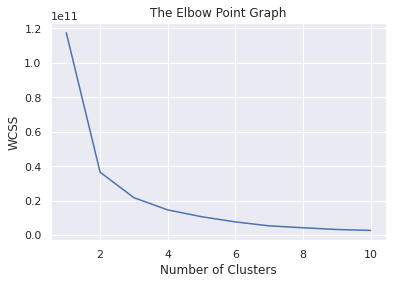

In [50]:
sns.set()
plt.plot(range(1,11),Wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The drastic change at some point shows the best number of clusters. That's why curve at the 3 clusters shows the elbow like shape so Optimal no fo clusters are 3

# Training The Model

In [51]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=9)
y=kmeans.fit_predict(x)
y

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [52]:
data['Cluster']=y

In [53]:
import warnings
warnings.filterwarnings("ignore")

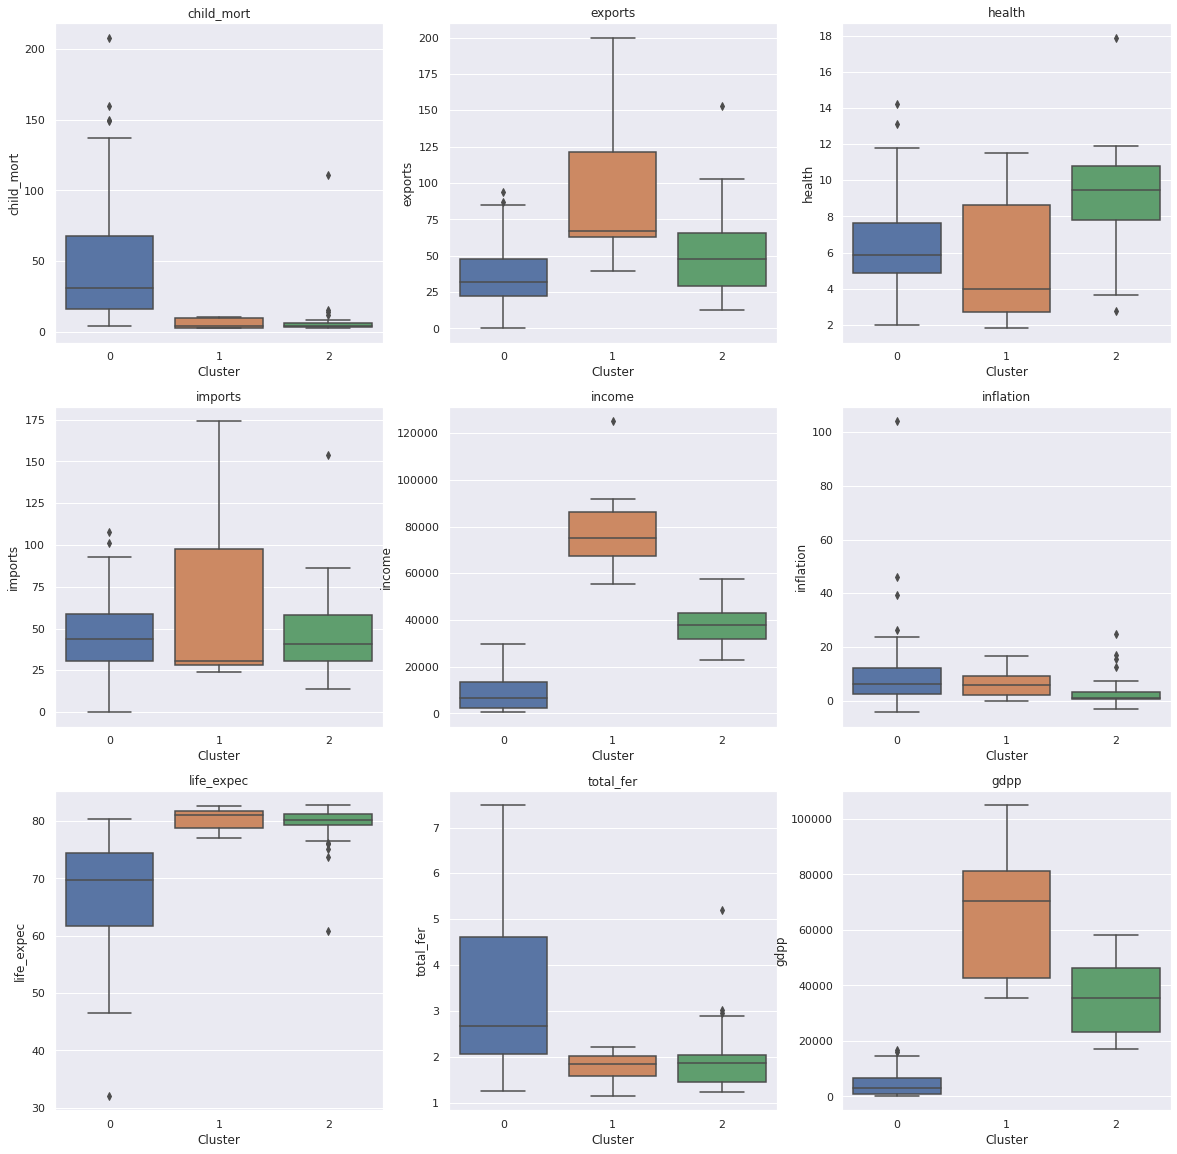

In [54]:
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data.Cluster,data[l[i]])
    plt.title(l[i])

# Result

**Observation of Graph:**


*   Graph between Cluster and **child_mort** is showing that there are greater number of deaths (ranging from 20 to 70) below 5 year child in cluster no 0 ( may be due to health issue ). which are more as compared to cluster 1 and 2 .
*  Graph between Cluster and **exports** showing that their are less no of exports in cluster 0 ranging from 24 to 50 which are less as compared to cluster 1 and 2.
*   Graph between Cluster and **health** is showing that there are less spending on health in Cluster 0 as compared to cluster 1 and 2.
*   Graph between Cluster and **income** is showing that  there is less income range in Cluster 0 as compared to 1 and 2.

*   There is more **inflation** in cluster 0.
*   **life_expec** range is less in cluster 0.


*   Graph between Cluster and **total_fer**  showing that population is increasing rapidly in cluster 0
*   **GDPP** is less in Cluster 0.


**All these results are showing that the HELP NGO should more focus on contries which are in cluster 0**




In [55]:
df_0=data[data['Cluster']==0]
df_1=data[data['Cluster']==1]
df_2=data[data['Cluster']==2]

In [57]:
df_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [58]:
df_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1


In [59]:
df_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2
